# 1. Présentation du projet "Prédiction du tir réussit de NBA"

# Contexte du Projet

Dans l'univers compétitif de la NBA, l'analyse de données est devenue un élément stratégique crucial influençant les décisions des équipes, des entraîneurs et des joueurs. Notre projet MLOps s'articule autour d'une problématique fondamentale : prédire avec précision si un tir sera réussi ou non en fonction de multiples paramètres contextuel, spatial et temporel.

Ce projet s'appuie sur un jeu de données historiques exceptionnellement riche, compilant plus de deux décennies de tirs en NBA (1997-2020). Ces données captent non seulement les coordonnées spatiales de chaque tir sur le terrain, mais également une multitude de caractéristiques contextuelles telles que le temps restant, le type de tir et la zone du terrain.

# Valeur Commerciale et Applications

La capacité à prédire avec précision les tirs réussis présente des applications concrètes et stratégiques:

Optimisation tactique: Permettre aux entraîneurs d'identifier les zones du terrain et les situations de jeu offrant les meilleures probabilités de réussite pour chaque joueur.

Recrutement et évaluation: Fournir des métriques avancées pour évaluer l'efficacité des joueurs dans diverses situations de jeu, au-delà des statistiques traditionnelles.

Analyse des adversaires: Identifier les vulnérabilités défensives des équipes adverses et les tendances de tir pour ajuster les stratégies défensives.

Engagement des fans: Développer des applications interactives permettant aux spectateurs d'accéder à des prédictions en temps réel pendant les matchs.

# Défis Techniques et Scientifiques

La mise en œuvre de ce projet dans un cadre MLOps présente plusieurs défis significatifs:

Hétérogénéité et volume des données: Notre jeu de données contient plusieurs millions de tirs, avec des caractéristiques numériques (coordonnées, distances), catégorielles (types de tirs, zones) et temporelles (minutes restantes, périodes).

Traitement des déséquilibres: Certaines situations de jeu ou zones du terrain peuvent être sous-représentées, nécessitant des techniques sophistiquées pour éviter les biais dans les prédictions.

Intégration de la dimension temporelle: L'évolution historique du jeu (changements de règles, évolution des styles de jeu) doit être prise en compte pour garantir la pertinence des prédictions.

Déploiement et surveillance: Le modèle devra être déployé dans un environnement permettant des prédictions rapides et fiables, tout en surveillant continuellement sa performance.

# Architecture MLOps Envisagée

Notre approche MLOps pour ce projet comprendra:

Pipeline d'ingénierie des données: Automatisation du nettoyage, de la validation et de la transformation des données brutes en caractéristiques exploitables.

Expérimentation et développement de modèles: Utilisation de frameworks modernes pour l'entraînement, la validation et la comparaison de différents algorithmes prédictifs.

Infrastructure de déploiement: Mise en place d'APIs et de microservices pour servir les prédictions avec une faible latence.

Surveillance et maintenance: Implémentation de systèmes de surveillance pour détecter la dérive des données et les baisses de performance.

Intégration continue et déploiement continu: Automatisation des tests et du déploiement pour faciliter l'amélioration itérative du modèle.

# Indicateurs de Performance

Le succès du projet sera mesuré à travers plusieurs métriques:

Précision prédictive: Accuracy, F1-score, AUC-ROC pour évaluer la qualité des prédictions.

Performance opérationnelle: Temps de réponse des prédictions, robustesse du système.

Impact business: Amélioration des stratégies de jeu basées sur les insights du modèle.

Cette initiative représente non seulement un défi technique passionnant, mais également une opportunité d'apporter une valeur ajoutée significative à l'analyse sportive moderne, en transformant des données brutes en insights stratégiques exploitables.

# 2. Pre-processing

## Import des modules et sous modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api
from scipy.stats import randint

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.inspection import permutation_importance
from plotly.subplots import make_subplots
from sklearn import preprocessing

In [ ]:
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor # regressor = DecisionTreeRegressor(random_state=0)
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report, r2_score, mean_squared_error, root_mean_squared_error

# 2.0. Prétraitement des Données
Le prétraitement des données constitue une étape fondamentale dans tout projet d'apprentissage automatique.  

In [ ]:
from google.colab import files
# téléchargez le fichier depuis mon PC vers Google Colab:
upload = files.upload()

Saving nba_data_raw.csv to nba_data_raw (1).csv


In [ ]:
# Chargement des données brutes
df_raw = pd.read_csv('nba_data_raw.csv')

# Affichage des premières lignes et structure
print(df_raw.head())
print(df_raw.info())

    Game ID  Game Event ID  Player ID    Player Name     Team ID  \
0  21100057            307     201580   JaVale McGee  1610612764   
1  29900683             68       1889   Andre Miller  1610612739   
2  20200012            219       2203  Shane Battier  1610612763   
3  29700558            493        951      Ray Allen  1610612749   
4  20501204            365       2545  Darko Milicic  1610612753   

             Team Name  Period  Minutes Remaining  Seconds Remaining  \
0   Washington Wizards       3                  9                 31   
1  Cleveland Cavaliers       1                  3                 57   
2    Memphis Grizzlies       2                  3                 16   
3      Milwaukee Bucks       4                  0                  7   
4        Orlando Magic       3                  0                 46   

  Action Type  ...         Shot Zone Area  Shot Zone Range Shot Distance  \
0  Layup Shot  ...              Center(C)  Less Than 8 ft.             1   
1   Ju

# Le jeu de données contient des informations sur les tirs effectués lors des matchs NBA, avec notamment:

Informations sur le match (Game ID, Date, équipes)

Caractéristiques du joueur (Player ID, Name)

Détails du tir (position sur le terrain, distance, type)

Variable cible: 'Shot Made Flag' (1 si réussi, 0 sinon)

# 2.1 Nettoyage des Données

In [ ]:
# Vérification et suppression des doublons
duplicates = df_raw.duplicated().sum()
print(f"Nombre de lignes dupliquées: {duplicates}")
df_clean = df_raw.drop_duplicates()

Nombre de lignes dupliquées: 0


In [ ]:
# Gestion des valeurs manquantes
missing_values = df_raw.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing_values[missing_values > 0])

Valeurs manquantes par colonne:
Series([], dtype: int64)


In [ ]:
# Remplacement des valeurs manquantes pour les colonnes numériques
numeric_cols = ['Shot Distance', 'X Location', 'Y Location']
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 2.2 Feature Engineering- Transformation du temps

In [ ]:
# Conversion de la date en format datetime
df_clean['Game Date'] = pd.to_datetime(df_clean['Game Date'], format='%Y%m%d')

# Extraction de caractéristiques temporelles
df_clean['Year'] = df_clean['Game Date'].dt.year
df_clean['Month'] = df_clean['Game Date'].dt.month
df_clean['Day_of_Week'] = df_clean['Game Date'].dt.dayofweek

# Temps restant total en secondes
df_clean['Seconds_Remaining_Total'] = df_clean['Minutes Remaining'] * 60 + df_clean['Seconds Remaining']

# Indicateurs de pression temporelle
df_clean['Clutch_Time'] = ((df_clean['Period'] >= 4) &
                          (df_clean['Minutes Remaining'] <= 2)).astype(int)

# 2.3 Feature Engineering- Transformation des Coordonées Spatiales

In [ ]:
# Distance euclidienne (possiblement redondante avec Shot Distance)
df_clean['Euclidean_Distance'] = np.sqrt(df_clean['X Location']**2 + df_clean['Y Location']**2)

# Angle du tir (en degrés, 0° étant directement devant le panier)
df_clean['Shot_Angle'] = np.arctan2(df_clean['Y Location'], df_clean['X Location']) * 180 / np.pi

# Côté du terrain (gauche/droite)
df_clean['Court_Side'] = np.where(df_clean['X Location'] < 0, 'Left', 'Right')

# Distance au centre du terrain
df_clean['Distance_From_Center'] = abs(df_clean['X Location'])

# 2.4 Feature Engineering - Variable Contextuelles

In [ ]:
# Indicateur si l'équipe joue à domicile
df_clean['Is_Home_Team'] = (df_clean['Team Name'] == df_clean['Home Team']).astype(int)

# Effet domicile/extérieur
conditions = [
    (df_clean['Team Name'] == df_clean['Home Team']),
    (df_clean['Team Name'] == df_clean['Away Team'])
]
choices = ['Home', 'Away']
df_clean['Home_Away'] = np.select(conditions, choices, default='Unknown')

# 2.5 Encodage des Variables Catégorielles

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identification des variables catégorielles
categorical_cols = ['Action Type', 'Shot Type', 'Shot Zone Basic',
                    'Shot Zone Area', 'Shot Zone Range', 'Court_Side',
                    'Home_Away', 'Season Type']

# Application du One-Hot Encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Alternative avec scikit-learn pour plus de contrôle
'''
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df_clean[categorical_cols])
encoded_df = pd.DataFrame(encoded_features,
                         columns=encoder.get_feature_names_out(categorical_cols))
df_processed = pd.concat([df_clean.drop(categorical_cols, axis=1), encoded_df], axis=1)
'''

"\nencoder = OneHotEncoder(sparse=False, drop='first')\nencoded_features = encoder.fit_transform(df_clean[categorical_cols])\nencoded_df = pd.DataFrame(encoded_features,\n                         columns=encoder.get_feature_names_out(categorical_cols))\ndf_processed = pd.concat([df_clean.drop(categorical_cols, axis=1), encoded_df], axis=1)\n"

# 2.6 Normalisation/Standalisation des Variables Numériques

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Colonnes à standardiser
numeric_features = ['Shot Distance', 'X Location', 'Y Location',
                   'Euclidean_Distance', 'Shot_Angle', 'Distance_From_Center',
                   'Seconds_Remaining_Total']

# Standardisation (moyenne=0, écart-type=1)
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Alternative: normalisation MinMax (valeurs entre 0 et 1)
'''
min_max_scaler = MinMaxScaler()
df_encoded[numeric_features] = min_max_scaler.fit_transform(df_encoded[numeric_features])
'''

'\nmin_max_scaler = MinMaxScaler()\ndf_encoded[numeric_features] = min_max_scaler.fit_transform(df_encoded[numeric_features])\n'

# 2.7 Sélection de Caractéristiques

In [ ]:
## Identifier les colonnes non numériques
non_numeric_columns = df_encoded.select_dtypes(exclude=['number']).columns
print("Colonnes non numériques qui causent l'erreur:", list(non_numeric_columns))

# Filtrer uniquement les colonnes numériques pour le calcul des corrélations
df_numeric = df_encoded.select_dtypes(include=['number'])

# Vérifier que la cible est dans les colonnes numériques
target = 'Shot Made Flag'
if target in df_numeric.columns:
    # Calculer et afficher les corrélations
    correlations = df_numeric.corr()[target].sort_values(ascending=False)
    print("Top 10 des caractéristiques les plus corrélées:")
    print(correlations.head(11))  # +1 car la cible elle-même sera aussi incluse
else:
    print(f"Attention: La colonne cible '{target}' n'est pas présente dans le dataframe numérique")

# Suppression de toutes les colonnes non pertinentes (y compris les colonnes textuelles)
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name',
                  'Team ID', 'Team Name', 'Home Team', 'Away Team', 'Game Date']

# S'assurer que ces colonnes existent encore dans le DataFrame
# et ajouter toutes les colonnes non numériques identifiées
columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]
columns_to_drop = list(set(columns_to_drop + list(non_numeric_columns)))

# Créer le DataFrame final sans les colonnes à supprimer
df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Vérification finale - s'assurer qu'il ne reste plus de colonnes non numériques
remaining_non_numeric = df_final.select_dtypes(exclude=['number']).columns
if len(remaining_non_numeric) > 0:
    print("Attention: Il reste encore des colonnes non numériques:", list(remaining_non_numeric))
    # Si nécessaire, encoder automatiquement ces colonnes restantes
    df_final = pd.get_dummies(df_final, drop_first=True)

# Réorganiser pour avoir la cible à la fin
cols = [col for col in df_final.columns if col != target] + [target]
df_final = df_final[cols]

print(f"Dimensions du dataset final après sélection des caractéristiques: {df_final.shape}")


Colonnes non numériques qui causent l'erreur: ['Player Name', 'Team Name', 'Game Date', 'Home Team', 'Away Team', 'Action Type_Alley Oop Layup shot', 'Action Type_Cutting Dunk Shot', 'Action Type_Cutting Layup Shot', 'Action Type_Driving Dunk Shot', 'Action Type_Driving Finger Roll Layup Shot', 'Action Type_Driving Finger Roll Shot', 'Action Type_Driving Floating Jump Shot', 'Action Type_Driving Hook Shot', 'Action Type_Driving Jump shot', 'Action Type_Driving Layup Shot', 'Action Type_Driving Reverse Layup Shot', 'Action Type_Dunk Shot', 'Action Type_Fadeaway Jump Shot', 'Action Type_Finger Roll Layup Shot', 'Action Type_Floating Jump shot', 'Action Type_Follow Up Dunk Shot', 'Action Type_Hook Shot', 'Action Type_Jump Bank Shot', 'Action Type_Jump Hook Shot', 'Action Type_Jump Shot', 'Action Type_Layup Shot', 'Action Type_Pullup Bank shot', 'Action Type_Pullup Jump shot', 'Action Type_Putback Dunk Shot', 'Action Type_Putback Layup Shot', 'Action Type_Putback Slam Dunk Shot', 'Action T

# 2.8 Finalisation et Enrégistrement du dataset prétraité

In [ ]:
# Réorganisation des colonnes (variable cible à la fin)
cols = [col for col in df_final.columns if col != target] + [target]
df_final = df_final[cols]

# Vérification finale
print(f"Dimensions du dataset final: {df_final.shape}")

# Enregistrement du fichier prétraité
df_final.to_csv('nba_data_processed.csv', index=False)

Dimensions du dataset final: (1000, 16)


# 2.9 Intégration des étapes en Pipeline Complet

Dimensions du dataset brut: (1000, 22)
Premières lignes:
    Game ID  Game Event ID  Player ID    Player Name     Team ID  \
0  21100057            307     201580   JaVale McGee  1610612764   
1  29900683             68       1889   Andre Miller  1610612739   
2  20200012            219       2203  Shane Battier  1610612763   
3  29700558            493        951      Ray Allen  1610612749   
4  20501204            365       2545  Darko Milicic  1610612753   

             Team Name  Period  Minutes Remaining  Seconds Remaining  \
0   Washington Wizards       3                  9                 31   
1  Cleveland Cavaliers       1                  3                 57   
2    Memphis Grizzlies       2                  3                 16   
3      Milwaukee Bucks       4                  0                  7   
4        Orlando Magic       3                  0                 46   

  Action Type  ...         Shot Zone Area  Shot Zone Range Shot Distance  \
0  Layup Shot  ...       

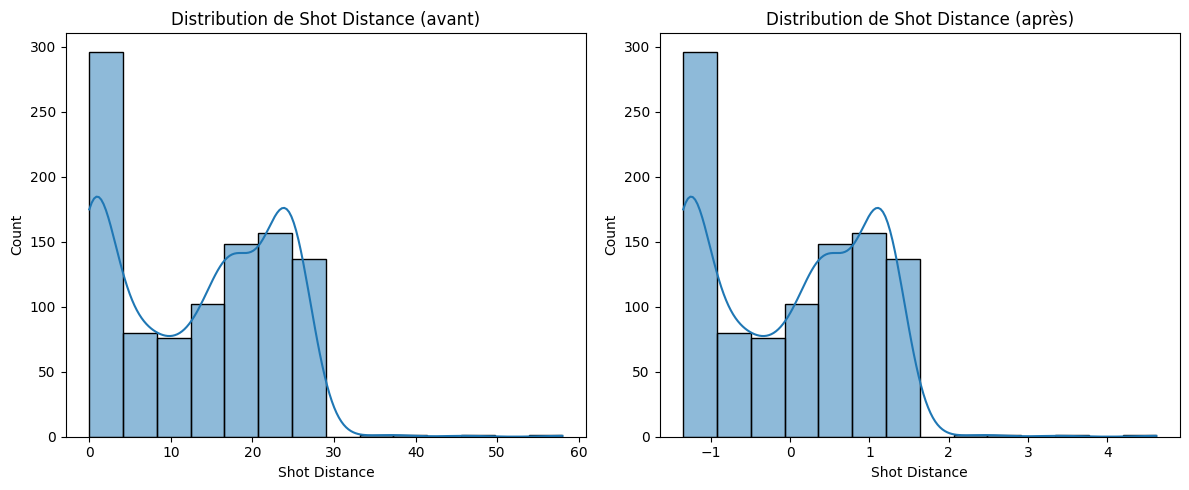

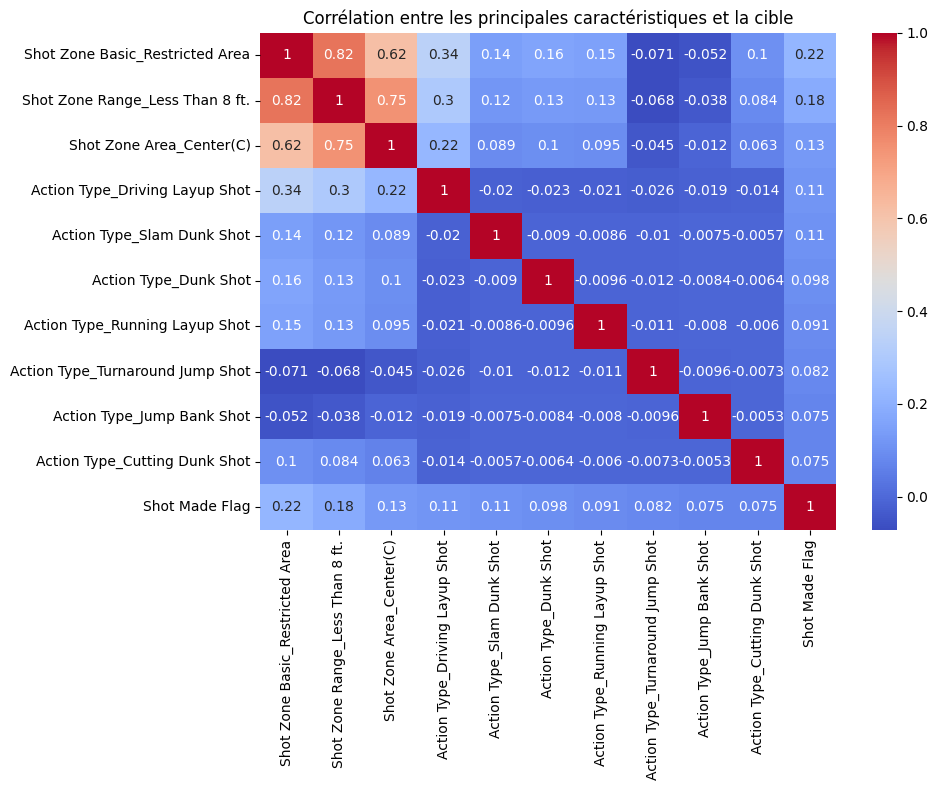

Prétraitement terminé et fichier sauvegardé avec succès!


In [ ]:
# Pour faciliter l'intégration dans Google Colab, voici le script complet combinant toutes les étapes:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Chargement et exploration initiale
df_raw = pd.read_csv('nba_data_raw.csv')
print("Dimensions du dataset brut:", df_raw.shape)
print("Premières lignes:")
print(df_raw.head())

# 2. Nettoyage des données
df_clean = df_raw.drop_duplicates()
numeric_cols = ['Shot Distance', 'X Location', 'Y Location']
for col in numeric_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# 3. Feature Engineering - Temps
df_clean['Game Date'] = pd.to_datetime(df_clean['Game Date'], format='%Y%m%d')
df_clean['Year'] = df_clean['Game Date'].dt.year
df_clean['Month'] = df_clean['Game Date'].dt.month
df_clean['Day_of_Week'] = df_clean['Game Date'].dt.dayofweek
df_clean['Seconds_Remaining_Total'] = df_clean['Minutes Remaining'] * 60 + df_clean['Seconds Remaining']
df_clean['Clutch_Time'] = ((df_clean['Period'] >= 4) & (df_clean['Minutes Remaining'] <= 2)).astype(int)

# 4. Feature Engineering - Coordonnées spatiales
df_clean['Euclidean_Distance'] = np.sqrt(df_clean['X Location']**2 + df_clean['Y Location']**2)
df_clean['Shot_Angle'] = np.arctan2(df_clean['Y Location'], df_clean['X Location']) * 180 / np.pi
df_clean['Court_Side'] = np.where(df_clean['X Location'] < 0, 'Left', 'Right')
df_clean['Distance_From_Center'] = abs(df_clean['X Location'])

# 5. Feature Engineering - Variables contextuelles
df_clean['Is_Home_Team'] = (df_clean['Team Name'] == df_clean['Home Team']).astype(int)
conditions = [(df_clean['Team Name'] == df_clean['Home Team']), (df_clean['Team Name'] == df_clean['Away Team'])]
choices = ['Home', 'Away']
df_clean['Home_Away'] = np.select(conditions, choices, default='Unknown')

# 6. Encodage des variables catégorielles
categorical_cols = ['Action Type', 'Shot Type', 'Shot Zone Basic', 'Shot Zone Area',
                   'Shot Zone Range', 'Court_Side', 'Home_Away', 'Season Type']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# 7. Normalisation/Standardisation
numeric_features = ['Shot Distance', 'X Location', 'Y Location', 'Euclidean_Distance',
                   'Shot_Angle', 'Distance_From_Center', 'Seconds_Remaining_Total']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# 8. Sélection de caractéristiques
target = 'Shot Made Flag'
columns_to_drop = ['Game ID', 'Game Event ID', 'Player ID', 'Player Name',
                  'Team ID', 'Team Name', 'Home Team', 'Away Team', 'Game Date']
df_final = df_encoded.drop(columns=columns_to_drop)

# 9. Finalisation
cols = [col for col in df_final.columns if col != target] + [target]
df_final = df_final[cols]
print(f"Dimensions du dataset final: {df_final.shape}")

# Visualisation des distributions avant/après prétraitement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_raw['Shot Distance'], kde=True)
plt.title('Distribution de Shot Distance (avant)')
plt.subplot(1, 2, 2)
sns.histplot(df_final['Shot Distance'], kde=True)
plt.title('Distribution de Shot Distance (après)')
plt.tight_layout()
plt.show()

# Matrice de corrélation avec la cible
plt.figure(figsize=(10, 8))
correlations = df_final.corr()[target].sort_values(ascending=False)
top_features = correlations.drop(target).head(10).index
sns.heatmap(df_final[list(top_features) + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les principales caractéristiques et la cible')
plt.tight_layout()
plt.show()

# Enregistrement du fichier prétraité
df_final.to_csv('nba_data_processed.csv', index=False)
print("Prétraitement terminé et fichier sauvegardé avec succès!")

# Explications Complémentaires sur les Transformations

Les transformations appliquées visent à extraire le maximum d'information pertinente pour prédire si un tir sera réussi:

Variables temporelles: La pression temporelle (dernières minutes d'un match)
peut influencer les performances des joueurs.

Variables spatiales: L'angle et la distance du tir sont des facteurs déterminants pour la réussite d'un tir en basketball.

Variables contextuelles: L'avantage du terrain (domicile/extérieur) peut affecter la confiance des joueurs.

Standardisation: Elle permet de ramener toutes les variables numériques à une même échelle, ce qui améliore la convergence des algorithmes d'apprentissage.

Encodage One-Hot: Transforme les variables catégorielles en format numérique utilisable par les algorithmes de machine learning.

Ce prétraitement complet prépare nos données pour l'entraînement de modèles prédictifs qui pourront déterminer avec précision si un tir sera réussi ou non, en fonction de nombreux facteurs contextuels et techniques.

# 3. Exploration et analyse des données prétraitées

Avant de passer à la modélisation, il est crucial de bien comprendre les caractéristiques de nos données prétraitées.

In [ ]:
# téléchargez le fichier depuis mon PC vers Google Colab:
upload = files.upload()

Saving nba_data_processed.csv to nba_data_processed (2).csv


            Period  Minutes Remaining  Seconds Remaining  Shot Distance  \
count  1000.000000        1000.000000        1000.000000   1.000000e+03   
mean      2.533000           5.218000          28.378000  -1.065814e-17   
std       1.153361           3.414108          17.452326   1.000500e+00   
min       1.000000           0.000000           0.000000  -1.345863e+00   
25%       1.000000           2.000000          13.000000  -1.140278e+00   
50%       3.000000           5.000000          28.000000   1.960255e-01   
75%       4.000000           8.000000          43.000000   1.018366e+00   
max       6.000000          11.000000          59.000000   4.616107e+00   

         X Location    Y Location         Year        Month  Day_of_Week  \
count  1.000000e+03  1.000000e+03  1000.000000  1000.000000  1000.000000   
mean   2.486900e-17 -4.263256e-17  2008.775000     5.938000     3.049000   
std    1.000500e+00  1.000500e+00     6.401512     4.399262     1.932442   
min   -2.181412e+00 

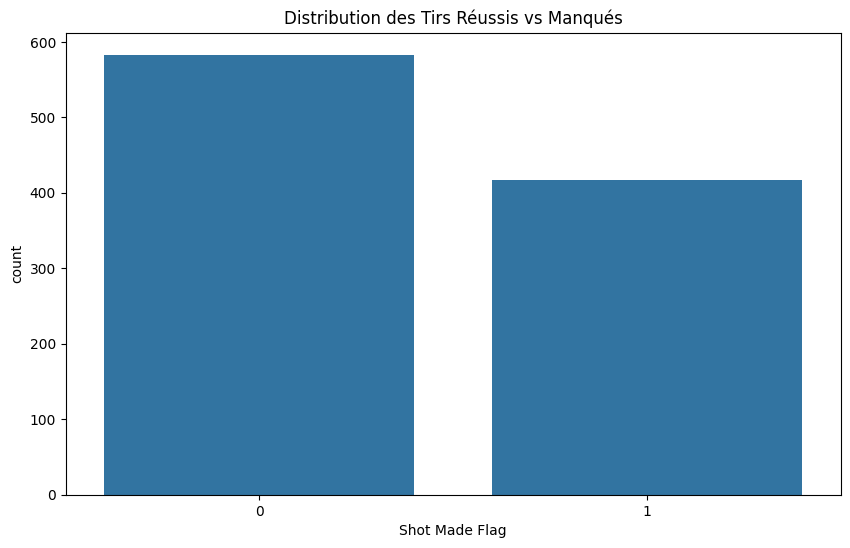

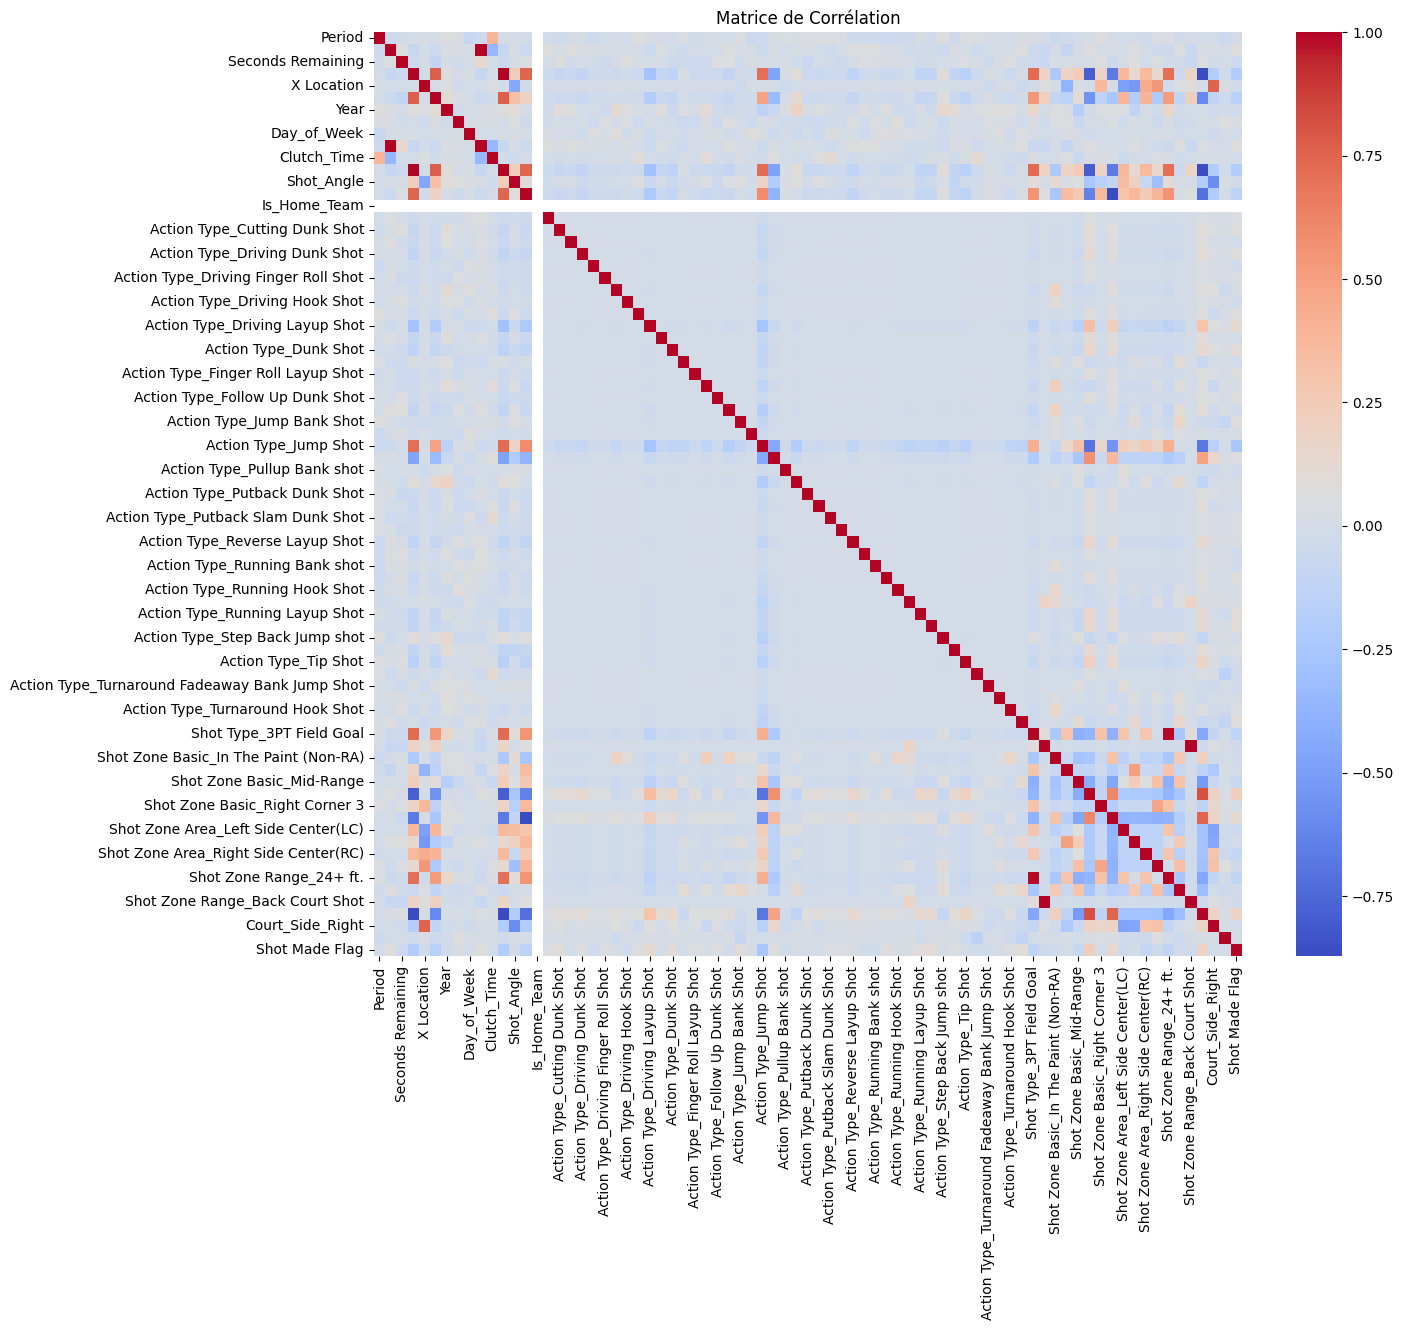

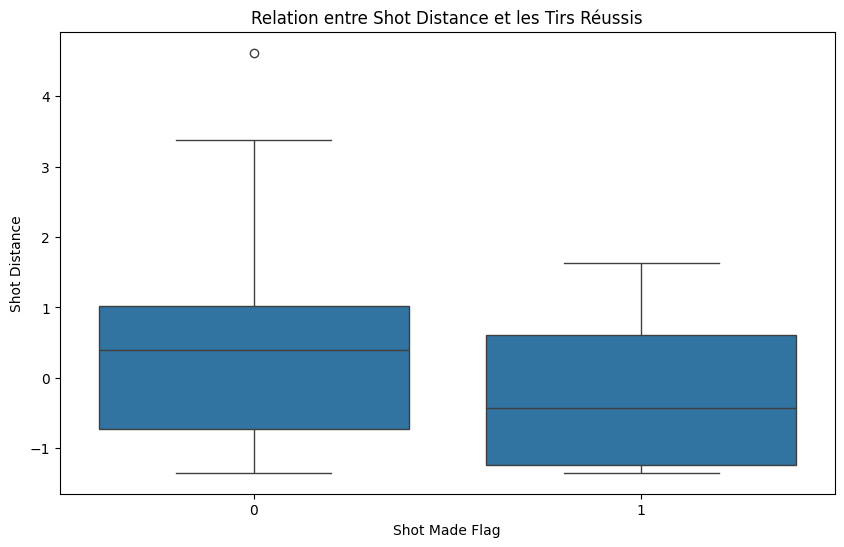

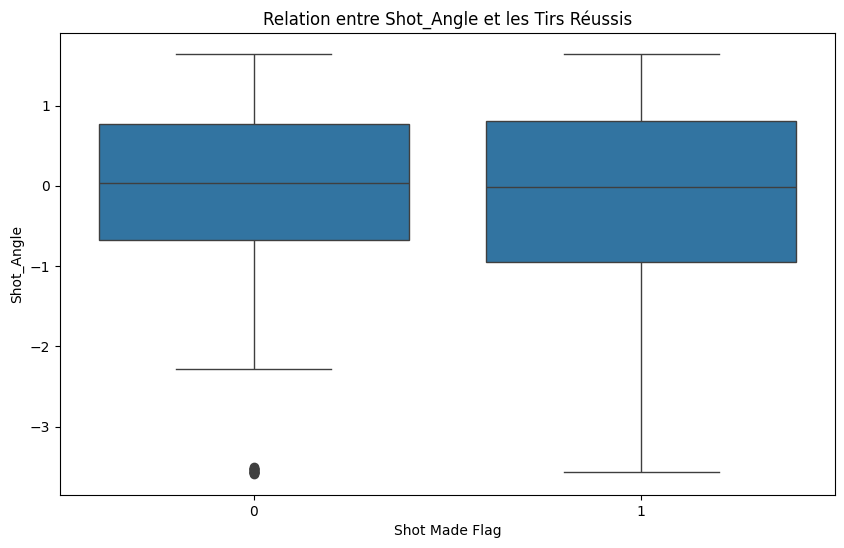

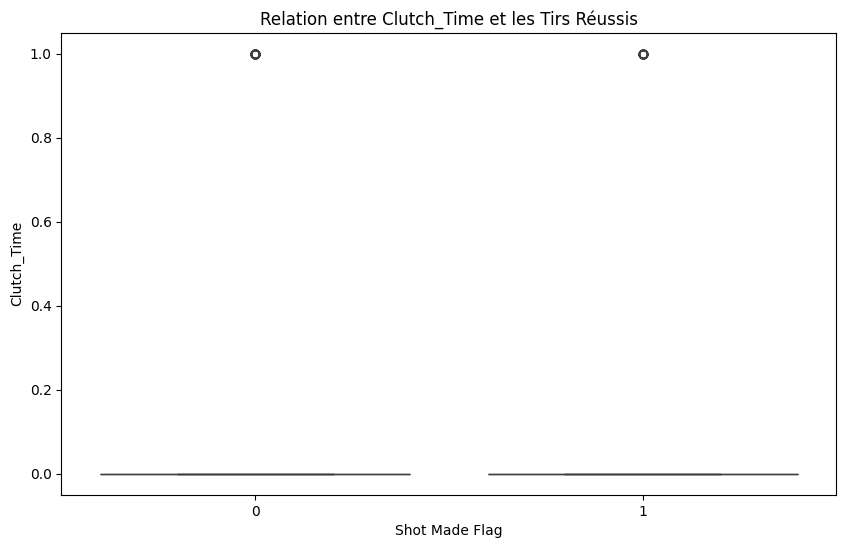

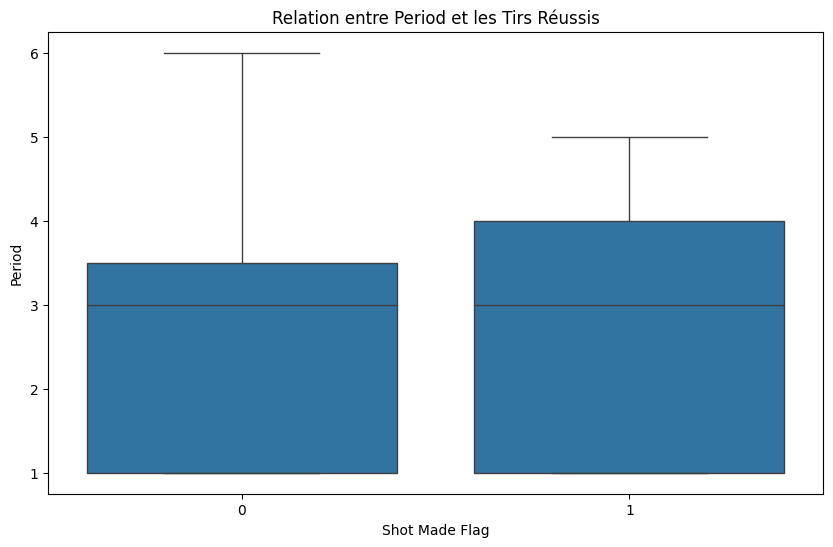

In [ ]:
# Chargement des données prétraitées
df = pd.read_csv('nba_data_processed.csv')

# Analyse statistique descriptive
print(df.describe())

# Visualisation de la distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.countplot(x='Shot Made Flag', data=df)
plt.title('Distribution des Tirs Réussis vs Manqués')
plt.show()

# Matrice de corrélation
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Analyse bivariée pour les variables importantes
features_to_analyze = ['Shot Distance', 'Shot_Angle', 'Clutch_Time', 'Period']
for feature in features_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Shot Made Flag', y=feature, data=df)
    plt.title(f'Relation entre {feature} et les Tirs Réussis')
    plt.show()

# Séparation des Données pour l'Entraînement et la Validation

In [ ]:
# Séparation des caractéristiques et de la variable cible
X = df.drop('Shot Made Flag', axis=1)
y = df['Shot Made Flag']

# Division en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de validation: {X_val.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")

Ensemble d'entraînement: 700 échantillons
Ensemble de validation: 150 échantillons
Ensemble de test: 150 échantillons


# Sélection des Caractéristiques Avancée

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

# 1. Prétraitement spécifique pour LightGBM
# Nettoyage des noms de colonnes (remplacer les espaces et caractères spéciaux)
X_train_clean = X_train.copy()
X_train_clean.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
                         for col in X_train_clean.columns]

# 2. Identifier et traiter les colonnes non numériques
non_numeric_cols = X_train_clean.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print(f"Colonnes non numériques détectées: {list(non_numeric_cols)}")
    # Supprimer ces colonnes pour l'analyse avec LightGBM
    X_train_clean = X_train_clean.select_dtypes(include=['number'])

# 3. Vérifier et traiter les valeurs manquantes ou infinies
X_train_clean = X_train_clean.replace([np.inf, -np.inf], np.nan)
if X_train_clean.isna().sum().sum() > 0:
    print("Valeurs manquantes détectées. Application d'une imputation...")
    X_train_clean = X_train_clean.fillna(X_train_clean.mean())

# 4. Sélection des caractéristiques avec des paramètres ajustés
try:
    feature_selector = SelectFromModel(
        LGBMClassifier(
            n_estimators=100,
            learning_rate=0.05,
            max_depth=5,           # Profondeur réduite pour éviter les avertissements
            min_child_samples=20,  # Plus robuste aux données parcimonieuses
            reg_alpha=0.1,         # Régularisation L1
            reg_lambda=0.1,        # Régularisation L2
            random_state=42,
            verbose=-1             # Réduire les messages
        ),
        threshold="median"
    )

    # 5. Ajuster le sélecteur sur les données nettoyées
    feature_selector.fit(X_train_clean, y_train)
    selected_features = X_train_clean.columns[feature_selector.get_support()]

    print(f"Caractéristiques sélectionnées ({len(selected_features)}/{X_train_clean.shape[1]}):")
    print(selected_features.tolist())

    # 6. Appliquer la sélection des caractéristiques
    X_train_selected = feature_selector.transform(X_train_clean)

    # 7. Préparer également les ensembles de validation et de test
    X_val_clean = X_val.copy()
    X_val_clean.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
                         for col in X_val_clean.columns]
    if len(non_numeric_cols) > 0:
        X_val_clean = X_val_clean.select_dtypes(include=['number'])
    X_val_clean = X_val_clean.replace([np.inf, -np.inf], np.nan).fillna(X_val_clean.mean())
    X_val_selected = feature_selector.transform(X_val_clean)

    X_test_clean = X_test.copy()
    X_test_clean.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
                          for col in X_test_clean.columns]
    if len(non_numeric_cols) > 0:
        X_test_clean = X_test_clean.select_dtypes(include=['number'])
    X_test_clean = X_test_clean.replace([np.inf, -np.inf], np.nan).fillna(X_test_clean.mean())
    X_test_selected = feature_selector.transform(X_test_clean)

    print(f"Dimensions après sélection des caractéristiques:")
    print(f"X_train_selected: {X_train_selected.shape}")
    print(f"X_val_selected: {X_val_selected.shape}")
    print(f"X_test_selected: {X_test_selected.shape}")

except Exception as e:
    print(f"Une erreur s'est produite avec LightGBM: {e}")
    # Méthode alternative si LightGBM échoue
    from sklearn.feature_selection import SelectKBest, f_classif

    print("Utilisation de SelectKBest comme méthode alternative...")
    selector = SelectKBest(f_classif, k=20)
    X_train_selected = selector.fit_transform(X_train_clean, y_train)
    selected_features = X_train_clean.columns[selector.get_support()]

    print(f"Caractéristiques sélectionnées avec SelectKBest ({len(selected_features)}):")
    print(selected_features.tolist())

    # Appliquer la même transformation aux ensembles de validation et de test
    X_val_selected = selector.transform(X_val_clean)
    X_test_selected = selector.transform(X_test_clean)

Colonnes non numériques détectées: ['Action_Type_Alley_Oop_Layup_shot', 'Action_Type_Cutting_Dunk_Shot', 'Action_Type_Cutting_Layup_Shot', 'Action_Type_Driving_Dunk_Shot', 'Action_Type_Driving_Finger_Roll_Layup_Shot', 'Action_Type_Driving_Finger_Roll_Shot', 'Action_Type_Driving_Floating_Jump_Shot', 'Action_Type_Driving_Hook_Shot', 'Action_Type_Driving_Jump_shot', 'Action_Type_Driving_Layup_Shot', 'Action_Type_Driving_Reverse_Layup_Shot', 'Action_Type_Dunk_Shot', 'Action_Type_Fadeaway_Jump_Shot', 'Action_Type_Finger_Roll_Layup_Shot', 'Action_Type_Floating_Jump_shot', 'Action_Type_Follow_Up_Dunk_Shot', 'Action_Type_Hook_Shot', 'Action_Type_Jump_Bank_Shot', 'Action_Type_Jump_Hook_Shot', 'Action_Type_Jump_Shot', 'Action_Type_Layup_Shot', 'Action_Type_Pullup_Bank_shot', 'Action_Type_Pullup_Jump_shot', 'Action_Type_Putback_Dunk_Shot', 'Action_Type_Putback_Layup_Shot', 'Action_Type_Putback_Slam_Dunk_Shot', 'Action_Type_Reverse_Dunk_Shot', 'Action_Type_Reverse_Layup_Shot', 'Action_Type_Running

# Entraînement et optimisation des Modèles


Entraînement du modèle: Logistic Regression
Modèle: Logistic Regression
Accuracy: 0.6200
Precision: 0.5814
Recall: 0.3906
F1-score: 0.4673
ROC-AUC: 0.5652
--------------------------------------------------

Entraînement du modèle: Random Forest


<ipython-input-45-5625f1c2e319>:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Modèle: Random Forest
Accuracy: 0.6067
Precision: 0.5641
Recall: 0.3438
F1-score: 0.4272
ROC-AUC: 0.5569
--------------------------------------------------

Entraînement du modèle: Gradient Boosting
Modèle: Gradient Boosting
Accuracy: 0.6067
Precision: 0.5532
Recall: 0.4062
F1-score: 0.4685
ROC-AUC: 0.5638
--------------------------------------------------

Entraînement du modèle: XGBoost
Modèle: XGBoost
Accuracy: 0.5867
Precision: 0.5200
Recall: 0.4062
F1-score: 0.4561
ROC-AUC: 0.5749
--------------------------------------------------

Entraînement du modèle: LightGBM
Modèle: LightGBM
Accuracy: 0.5800
Precision: 0.5094
Recall: 0.4219
F1-score: 0.4615
ROC-AUC: 0.5547
--------------------------------------------------
Meilleur modèle: XGBoost (ROC-AUC: 0.5749)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-45-5625f1c2e319>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_name', y=metric, data=results_df, palette=colors)
<ipython-input-45-5625f1c2e319>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be re

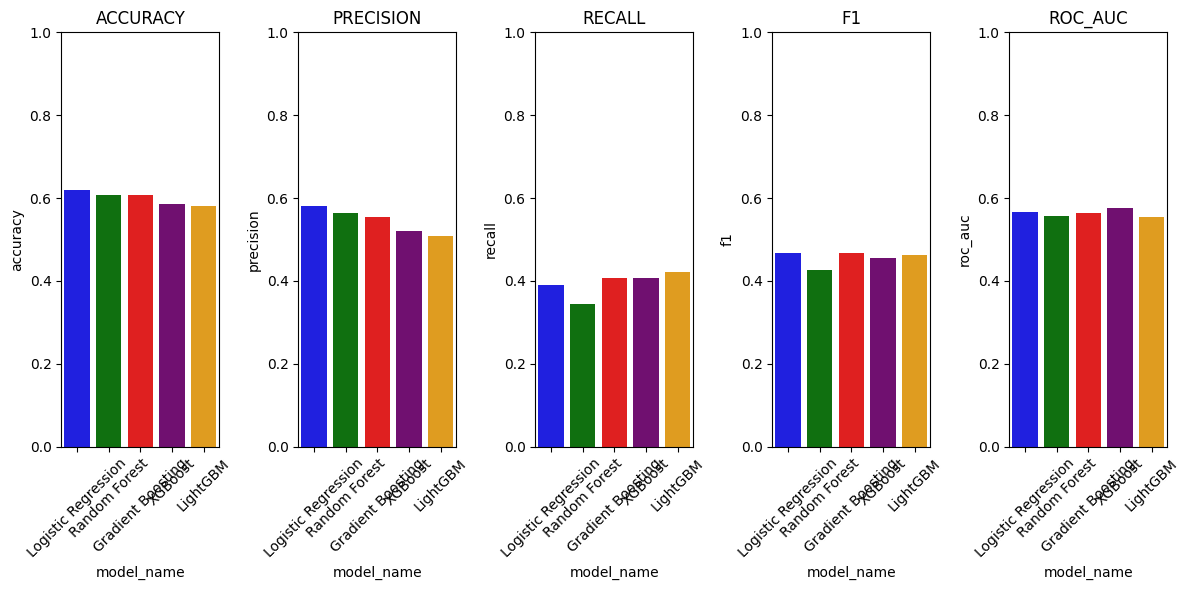


Optimisation des hyperparamètres pour XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs paramètres:
subsample: 1.0
n_estimators: 50
min_child_weight: 7
max_depth: 3
learning_rate: 0.05
colsample_bytree: 0.8

Performances du modèle optimisé:
Accuracy: 0.6000
Precision: 0.5556
Recall: 0.3125
F1-score: 0.4000
ROC-AUC: 0.5532


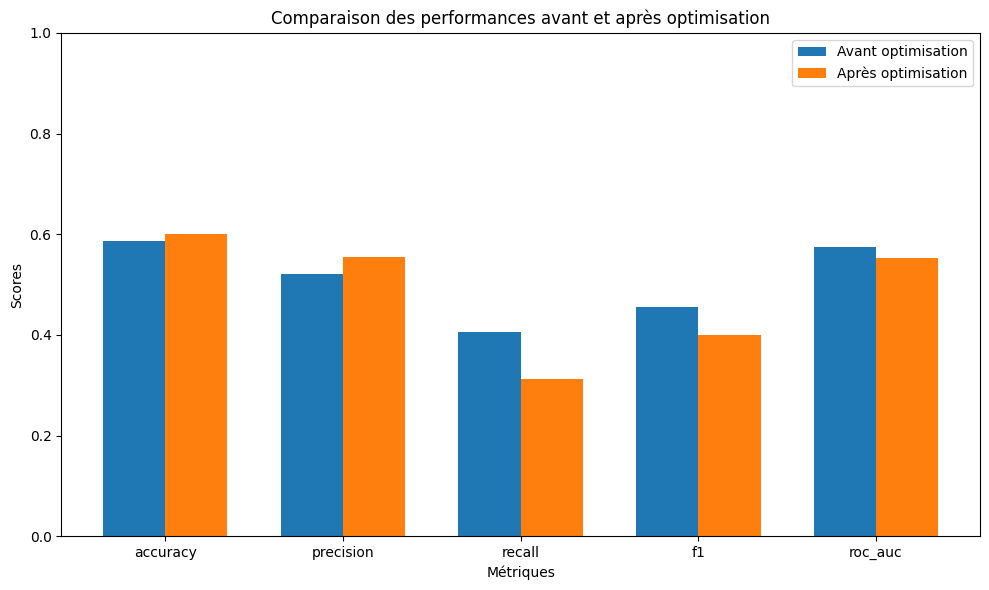

Le meilleur modèle a été sauvegardé sous 'xgboost_model.joblib'


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from datetime import datetime

# Création d'un DataFrame pour stocker les résultats des modèles
results_df = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'timestamp'])

# Définition des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# Entraînement et évaluation de chaque modèle
best_score = 0
best_model_name = None
best_model = None

for name, model in models.items():
    print(f"\nEntraînement du modèle: {name}")
    start_time = datetime.now()

    # Entraînement du modèle
    model.fit(X_train_selected, y_train)

    # Prédictions
    y_val_pred = model.predict(X_val_selected)
    y_val_proba = model.predict_proba(X_val_selected)[:, 1]

    # Métriques d'évaluation
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_proba)

    # Enregistrement des résultats avec pd.concat (méthode recommandée)
    new_row = pd.DataFrame({
        'model_name': [name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1': [f1],
        'roc_auc': [roc_auc],
        'timestamp': [datetime.now().strftime("%Y-%m-%d %H:%M:%S")]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    print(f"Modèle: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("-" * 50)

    # Mise à jour du meilleur modèle
    if roc_auc > best_score:
        best_score = roc_auc
        best_model_name = name
        best_model = model

print(f"Meilleur modèle: {best_model_name} (ROC-AUC: {best_score:.4f})")

# Visualisation des résultats
plt.figure(figsize=(12, 6))
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, metric in enumerate(metrics):
    plt.subplot(1, 5, i+1)
    sns.barplot(x='model_name', y=metric, data=results_df, palette=colors)
    plt.title(f'{metric.upper()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Si le meilleur modèle est XGBoost, optimisation des hyperparamètres
if best_model_name == "XGBoost":
    print("\nOptimisation des hyperparamètres pour XGBoost...")
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 8],
        'n_estimators': [50, 100, 200, 300],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5, 7]
    }

    # Recherche aléatoire des hyperparamètres
    random_search = RandomizedSearchCV(
        XGBClassifier(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    random_search.fit(X_train_selected, y_train)

    # Meilleurs paramètres
    best_params = random_search.best_params_
    print("Meilleurs paramètres:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

    # Évaluation du modèle optimisé
    best_model = random_search.best_estimator_
    y_val_pred = best_model.predict(X_val_selected)
    y_val_proba = best_model.predict_proba(X_val_selected)[:, 1]

    optimized_accuracy = accuracy_score(y_val, y_val_pred)
    optimized_precision = precision_score(y_val, y_val_pred)
    optimized_recall = recall_score(y_val, y_val_pred)
    optimized_f1 = f1_score(y_val, y_val_pred)
    optimized_roc_auc = roc_auc_score(y_val, y_val_proba)

    print("\nPerformances du modèle optimisé:")
    print(f"Accuracy: {optimized_accuracy:.4f}")
    print(f"Precision: {optimized_precision:.4f}")
    print(f"Recall: {optimized_recall:.4f}")
    print(f"F1-score: {optimized_f1:.4f}")
    print(f"ROC-AUC: {optimized_roc_auc:.4f}")

    # Comparaison avant/après optimisation
    plt.figure(figsize=(10, 6))
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    before_optimization = results_df[results_df['model_name'] == 'XGBoost'][metrics].values[0]
    after_optimization = [optimized_accuracy, optimized_precision, optimized_recall, optimized_f1, optimized_roc_auc]

    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, before_optimization, width, label='Avant optimisation')
    plt.bar(x + width/2, after_optimization, width, label='Après optimisation')

    plt.xlabel('Métriques')
    plt.ylabel('Scores')
    plt.title('Comparaison des performances avant et après optimisation')
    plt.xticks(x, metrics)
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Sauvegarde du meilleur modèle
import joblib
model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.joblib"
joblib.dump(best_model, model_filename)
print(f"Le meilleur modèle a été sauvegardé sous '{model_filename}'")



# Optimisation des Hyperparamètres du Meilleur Modèle


Optimisation des hyperparamètres pour XGBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Meilleurs paramètres:
subsample: 1.0
n_estimators: 50
min_child_weight: 7
max_depth: 3
learning_rate: 0.05
colsample_bytree: 0.8

Performances du modèle optimisé:
Accuracy: 0.6000
Precision: 0.5556
Recall: 0.3125
F1-score: 0.4000
ROC-AUC: 0.5532


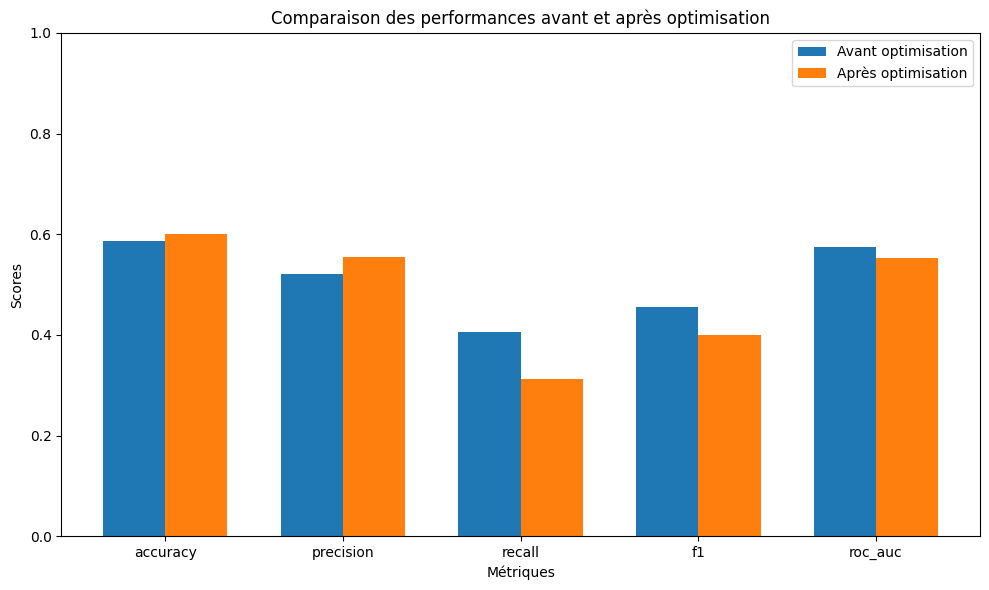

In [ ]:
# Optimisation des Hyperparamètres du Meilleur Modèle
if best_model_name == "XGBoost":
    print("\nOptimisation des hyperparamètres pour XGBoost...")
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5, 6, 8],
        'n_estimators': [50, 100, 200, 300],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5, 7]
    }

    # Recherche aléatoire des hyperparamètres
    random_search = RandomizedSearchCV(
        XGBClassifier(random_state=42),
        param_distributions=param_grid,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    random_search.fit(X_train_selected, y_train)

    # Meilleurs paramètres
    best_params = random_search.best_params_
    print("Meilleurs paramètres:")
    for param, value in best_params.items():
        print(f"{param}: {value}")

    # Évaluation du modèle optimisé
    best_model = random_search.best_estimator_
    y_val_pred = best_model.predict(X_val_selected)
    y_val_proba = best_model.predict_proba(X_val_selected)[:, 1]

    optimized_accuracy = accuracy_score(y_val, y_val_pred)
    optimized_precision = precision_score(y_val, y_val_pred)
    optimized_recall = recall_score(y_val, y_val_pred)
    optimized_f1 = f1_score(y_val, y_val_pred)
    optimized_roc_auc = roc_auc_score(y_val, y_val_proba)

    print("\nPerformances du modèle optimisé:")
    print(f"Accuracy: {optimized_accuracy:.4f}")
    print(f"Precision: {optimized_precision:.4f}")
    print(f"Recall: {optimized_recall:.4f}")
    print(f"F1-score: {optimized_f1:.4f}")
    print(f"ROC-AUC: {optimized_roc_auc:.4f}")

    # Comparaison avant/après optimisation - avec pd.concat au lieu de append
    plt.figure(figsize=(10, 6))
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    before_optimization = results_df[results_df['model_name'] == 'XGBoost'][metrics].values[0]
    after_optimization = [optimized_accuracy, optimized_precision, optimized_recall, optimized_f1, optimized_roc_auc]

    # Enregistrement des résultats du modèle optimisé dans notre DataFrame de suivi
    new_row = pd.DataFrame({
        'model_name': ['XGBoost (optimisé)'],
        'accuracy': [optimized_accuracy],
        'precision': [optimized_precision],
        'recall': [optimized_recall],
        'f1': [optimized_f1],
        'roc_auc': [optimized_roc_auc],
        'timestamp': [datetime.now().strftime("%Y-%m-%d %H:%M:%S")]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Visualisation de la comparaison
    x = np.arange(len(metrics))
    width = 0.35

    plt.bar(x - width/2, before_optimization, width, label='Avant optimisation')
    plt.bar(x + width/2, after_optimization, width, label='Après optimisation')

    plt.xlabel('Métriques')
    plt.ylabel('Scores')
    plt.title('Comparaison des performances avant et après optimisation')
    plt.xticks(x, metrics)
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    # Si le meilleur modèle n'est pas XGBoost, nous utilisons directement le meilleur modèle sans optimisation
    print(f"\nLe meilleur modèle est {best_model_name}, nous continuons avec ce modèle sans optimisation supplémentaire.")
    # Assurons-nous que best_model est défini pour la phase d'évaluation
    best_model = best_model



# Évaluation sur l'Ensemble de Test

Cette étape permet d'évaluer le modèle final sur l'ensemble de test, qui n'a pas été utilisé pendant l'entraînement ou l'optimisation:



Évaluation du modèle final sur l'ensemble de test
Performances sur l'ensemble de test:
Accuracy: 0.6000
Precision: 0.6579
Recall: 0.3472
F1-score: 0.4545
ROC-AUC: 0.5901


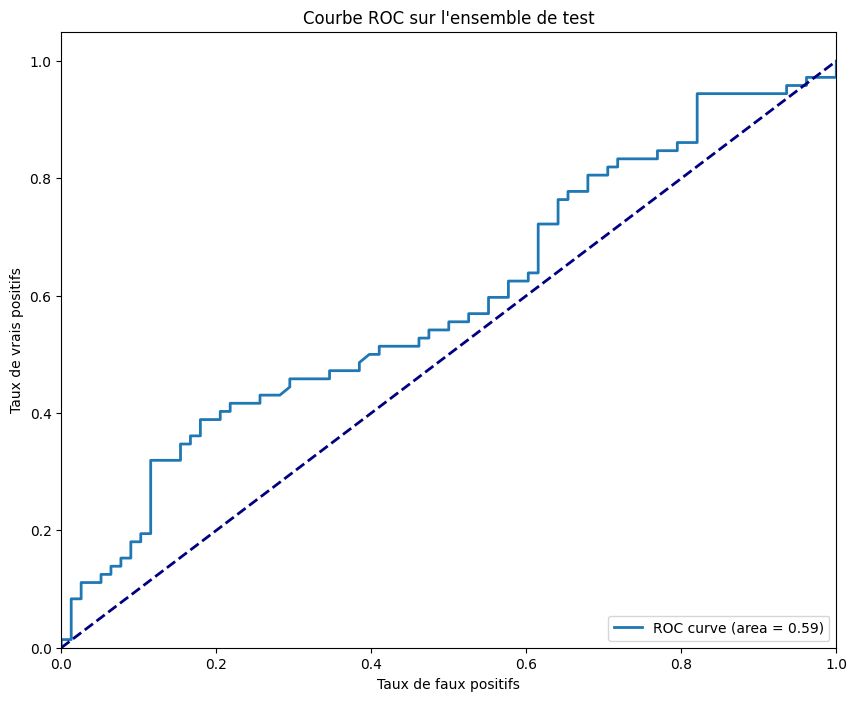

<Figure size 800x600 with 0 Axes>

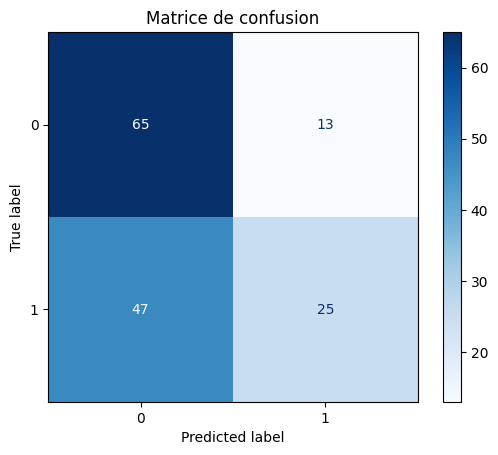

In [ ]:
# Évaluation sur l'Ensemble de Test
print("\nÉvaluation du modèle final sur l'ensemble de test")

# Utiliser le meilleur modèle (optimisé si c'est XGBoost, sinon le meilleur des modèles initiaux)
final_model = best_model

# Prédictions sur l'ensemble de test
y_test_pred = final_model.predict(X_test_selected)
y_test_proba = final_model.predict_proba(X_test_selected)[:, 1]

# Métriques de performance
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

print("Performances sur l'ensemble de test:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

# Courbe ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC sur l\'ensemble de test')
plt.legend(loc="lower right")
plt.savefig('roc_curve.png')
plt.show()

# Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matrice de confusion')
plt.savefig('confusion_matrix.png')
plt.show()

# Analyse d'importance des caractéristiques adaptée

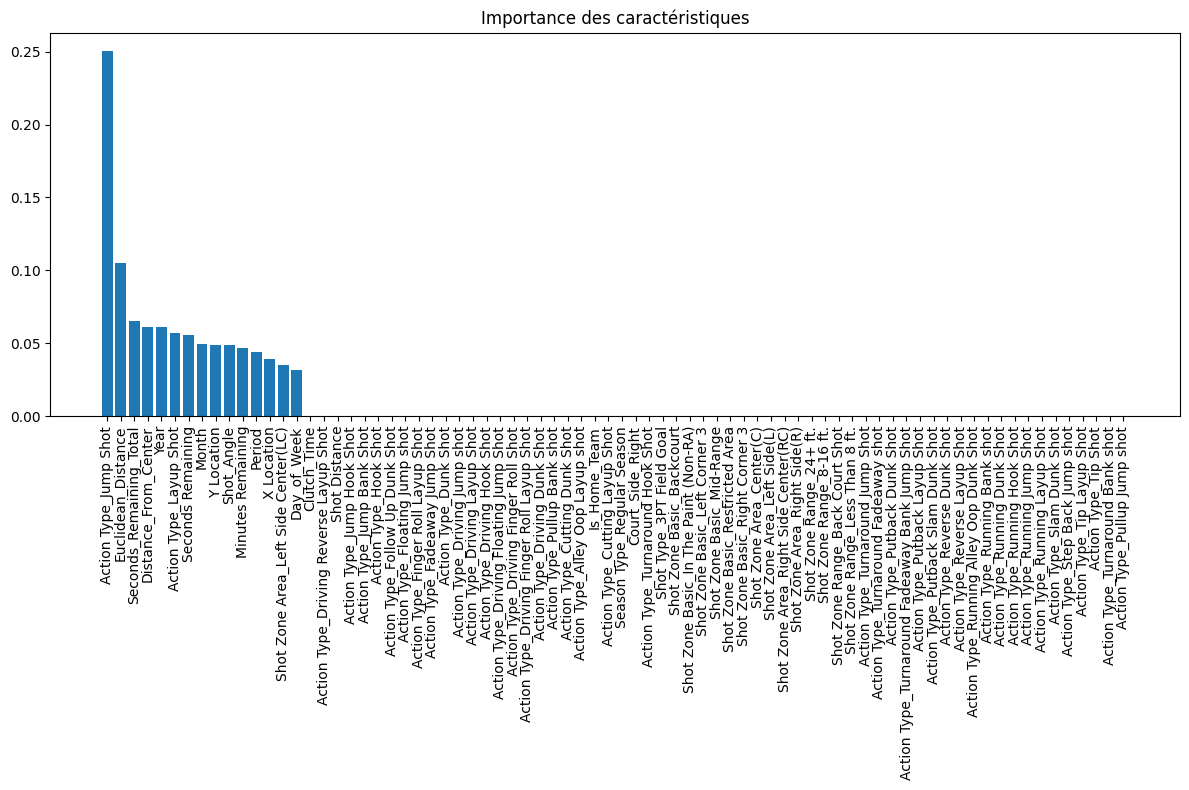

Les 10 caractéristiques les plus importantes:
1. Action Type_Jump Shot (0.2504)
2. Euclidean_Distance (0.1048)
3. Seconds_Remaining_Total (0.0654)
4. Distance_From_Center (0.0614)
5. Year (0.0612)
6. Action Type_Layup Shot (0.0569)
7. Seconds Remaining (0.0559)
8. Month (0.0495)
9. Y Location (0.0489)
10. Shot_Angle (0.0488)


In [59]:
# 1. Avant l'entraînement ou la sélection des caractéristiques
original_feature_names = X_train.columns.tolist()

# 2. Après la transformation et l'entraînement du modèle
if hasattr(final_model, 'feature_importances_'):
    importances = final_model.feature_importances_
    indices = np.argsort(importances)[::-1]

# 3. Si nous avons utilisé un sélecteur de caractéristiques, récupére les caractéristiques sélectionnées
    if 'feature_selector' in locals() and hasattr(feature_selector, 'get_support'):
        selected_indices = feature_selector.get_support(indices=True)
        feature_names = [original_feature_names[i] for i in selected_indices]
    else:
        # Si nous n'avons pas de sélecteur mais que vous connaissez les noms originaux
        feature_names = original_feature_names

    # 4. Création du graphique avec les noms corrects
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(importances)), importances[indices])

    # Utilisez les noms des caractéristiques pour l'étiquetage
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.title('Importance des caractéristiques')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()

    # 5. Affichage des caractéristiques les plus importantes dans la console pour référence
    print("Les 10 caractéristiques les plus importantes:")
    for i in range(min(10, len(indices))):
        idx = indices[i]
        try:
            print(f"{i+1}. {feature_names[idx]} ({importances[idx]:.4f})")
        except IndexError:
            print(f"{i+1}. Feature {idx} ({importances[idx]:.4f})")


# Création d'une pipeline de prédiction

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
import joblib

# Classe personnalisée pour conserver les colonnes sélectionnées précédemment
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names=None):
        self.feature_names = feature_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.feature_names is not None:
            # S'assurer que toutes les colonnes nécessaires sont présentes
            missing_cols = set(self.feature_names) - set(X.columns)
            if missing_cols:
                raise ValueError(f"Colonnes manquantes: {missing_cols}")

            # Sélectionner les colonnes dans le bon ordre
            return X[self.feature_names]
        return X

# Obtenir les noms des colonnes actuellement utilisées
if isinstance(X_train_selected, pd.DataFrame):
    selected_feature_names = X_train_selected.columns.tolist()
else:
    # Si X_train_selected est un numpy array, on utilise les colonnes originales
    # qui correspondent aux caractéristiques sélectionnées
    if 'feature_selector' in locals() and hasattr(feature_selector, 'get_support'):
        selected_feature_names = X_train.columns[feature_selector.get_support()].tolist()
    else:
        # Fallback: utiliser toutes les colonnes de X_train
        selected_feature_names = X_train.columns.tolist()

print(f"Nombre de caractéristiques sélectionnées: {len(selected_feature_names)}")
print(f"Premières caractéristiques: {selected_feature_names[:5]} ...")

# Création d'une pipeline avec un sélecteur de caractéristiques explicite
# qui préserve l'ordre des colonnes
pipeline_steps = [
    ('feature_selector', FeatureSelector(feature_names=selected_feature_names)),
    ('model', final_model)
]

full_pipeline = Pipeline(pipeline_steps)

# Convertir X_train en DataFrame si ce n'est pas déjà le cas
# pour s'assurer que les noms de colonnes sont préservés
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=selected_feature_names)

# Entraînement de la pipeline complète
print("Entraînement de la pipeline complète...")
full_pipeline.fit(X_train, y_train)

# Vérification que la pipeline fonctionne
print("Test de la pipeline sur quelques exemples...")
if isinstance(X_test, pd.DataFrame):
    sample_pred = full_pipeline.predict(X_test.iloc[:5])
    sample_proba = full_pipeline.predict_proba(X_test.iloc[:5])[:, 1]
else:
    X_test_df = pd.DataFrame(X_test, columns=selected_feature_names)
    sample_pred = full_pipeline.predict(X_test_df.iloc[:5])
    sample_proba = full_pipeline.predict_proba(X_test_df.iloc[:5])[:, 1]

for i in range(5):
    print(f"Exemple {i+1}: Prédiction = {sample_pred[i]}, Probabilité = {sample_proba[i]:.4f}")

# Sauvegarde de la pipeline
joblib.dump(full_pipeline, 'nba_shot_prediction_pipeline.joblib')
print("Pipeline complète sauvegardée sous 'nba_shot_prediction_pipeline.joblib'")

Nombre de caractéristiques sélectionnées: 76
Premières caractéristiques: ['Period', 'Minutes Remaining', 'Seconds Remaining', 'Shot Distance', 'X Location'] ...
Entraînement de la pipeline complète...
Test de la pipeline sur quelques exemples...
Exemple 1: Prédiction = 1, Probabilité = 0.5001
Exemple 2: Prédiction = 0, Probabilité = 0.4304
Exemple 3: Prédiction = 1, Probabilité = 0.6303
Exemple 4: Prédiction = 1, Probabilité = 0.6333
Exemple 5: Prédiction = 0, Probabilité = 0.3633
Pipeline complète sauvegardée sous 'nba_shot_prediction_pipeline.joblib'
